# Jafuno Douba

In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


print(__doc__)

import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Automatically created module for IPython interactive environment



============================
Underfitting vs. Overfitting
============================

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. 

We are going to construct models with polynomial features of different degrees.

We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.



### True function
In this part, the true function that we want to estimate is
$$
f(x) = \cos \left(\frac{3}{2} x \right).
$$

### Construction of data
We assume that we have access to a sample $((X_i, Y_i))_{1\leq i \leq n_{samples}}$, generated as follows
$$
Y_i = f(X_i) + \varepsilon_i,
$$
where $\varepsilon_i$ is a centered Gaussian variable of variance $\sigma^2$, and $X_i$ is a uniform random variable on $[0,1]$.



In [2]:
# Put your code here
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]
epsilon = np.random.randn(n_samples) * 0.1
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + epsilon
#y.reshape(1,30)


We propose to estimate $f$ using polynomial approximation. Therefore we consider the following model
$$
Y_i = \sum_{\ell=0}^p \beta_i X_i^\ell + \epsilon_i.
$$
For  $p=1, 4 , 15$, construct your own least squares approximation.

In [3]:
p=[1,4,15]

In [4]:
def least_squares(y, x):
        """calculate the least squares solution."""
        a = x.T.dot(x)
        b = x.T.dot(y)
        return np.linalg.solve(a, b)

In [5]:
for k in p:
    X=np.array([[a**i for i in range (0,k+1)] for a in x])
    beta=least_squares(y, X)
    Y= X.dot(beta)+epsilon
    print('pour p =',k)
    print('approximation de Y:\n',Y)

pour p = 1
approximation de Y:
 [ 0.98396299  0.76373141  0.8103497   0.9176251   0.83811305  0.53258323
  0.67805867  0.56259396  0.48721027  0.51063906  0.48055992  0.53418154
  0.4446999   0.23948743  0.17148551  0.15091084  0.2555504  -0.06967792
 -0.02142393 -0.20114097 -0.60722907 -0.47507872 -0.46132093 -0.64571125
 -0.35332087 -0.75115765 -0.63709342 -0.94086771 -1.04797094 -1.15577561]
pour p = 4
approximation de Y:
 [ 1.2452584   1.04363596  1.08977362  1.19479103  1.10411935  0.79008669
  0.91008361  0.79123908  0.65414641  0.65197513  0.6186374   0.59263607
  0.48089196  0.11095216 -0.07347863 -0.10476044 -0.0127672  -0.49077008
 -0.44548757 -0.6726767  -1.15332691 -0.93522802 -0.91518926 -1.07765684
 -0.77652117 -1.14721617 -0.98997461 -0.76062821 -0.00374803  0.27517698]
pour p = 15
approximation de Y:
 [ 1.31151274  1.03919799  1.09124487  1.2021683   1.10247147  0.77506682
  0.86067106  0.7385743   0.5940681   0.60918978  0.57854374  0.62929991
  0.53712062  0.20895452 

Compare your polynomial least square approximation when the degree of the polynomial is 1, 4 , 15.

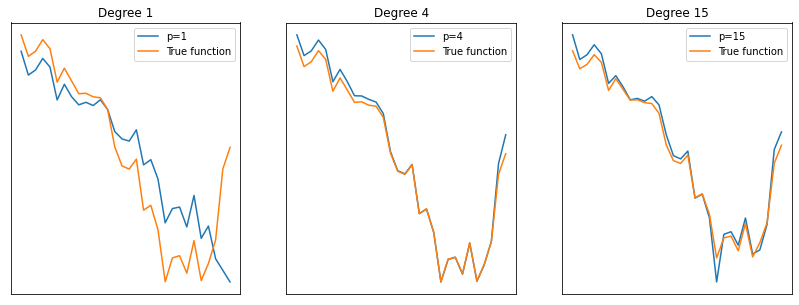

In [6]:
degrees = [1, 4, 15]
plt.figure(figsize=(14, 5))
for d in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), d + 1)
    plt.setp(ax, xticks=(), yticks=())  # les 3 cases   
    # Put your code here
    X=np.array([[a**i for i in range (0,degrees[d]+1)] for a in x])
    beta=least_squares(y, X)
    Y= X.dot(beta)+epsilon
    l='p=' +str(degrees[d])
    plt.plot(Y,label=l)
    plt.plot(y, label="True function")
    plt.title("Degree {}".format(degrees[d]))
    plt.legend(loc="best")
plt.show()  
    
    
    

-------

## Conclusion 
We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.

-----

## Using scikit-learn

Another way to construct polynomial approximations using scikit learn. 
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.


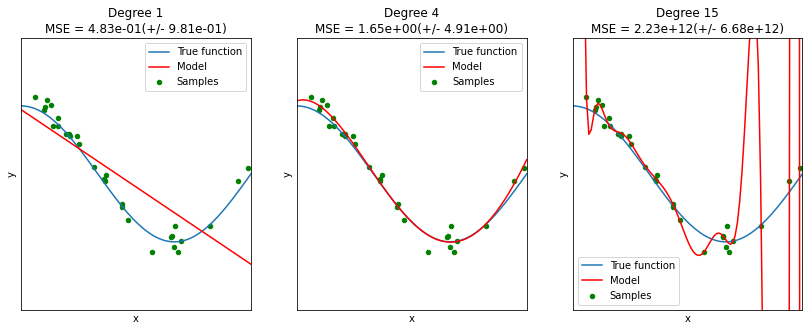

In [7]:
# Using scikit learn

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),  
                         ("linear_regression", linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)  #régression polynomiale puis régression linéaire dessus 

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, x[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, true_fun(x_test), label="True function")
    plt.scatter(x, y, facecolor='g', s=20, label="Samples")
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model",color='r')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()